# AUC Plot 

In [97]:
from pyforest import *

## Predict Proprietary

In [98]:
df = pd.read_csv(r'../data/modeling/combined.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [99]:
from sklearn.model_selection import train_test_split

# data = df.drop(columns = 'proprietary')
data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log']]
target = df['proprietary']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

In [100]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

### KNN 

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

model = knn
y = df.proprietary

scores = cross_val_score(model, df, y, cv=6)
print(scores)


KNNpredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(df.proprietary, KNNpredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, KNNpredictions))

print("precision: ",metrics.precision_score(y, KNNpredictions))

print("recall: ",metrics.recall_score(y, KNNpredictions))

print("kappa: ",metrics.cohen_kappa_score(y, KNNpredictions))


[0.68113523 0.67946578 0.68113523 0.34615385 0.06187291 0.32608696]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1460   981  2441
1           948   202  1150
All        2408  1183  3591
accuracy:  0.4628237259816207
precision:  0.17075232459847844
recall:  0.17565217391304347
kappa:  -0.2245285096810039


## Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y = df.proprietary
model = gnb

scores = cross_val_score(model, df, y, cv=6)
print(scores)

gnbPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, gnbPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, gnbPredictions))

print("precision:",metrics.precision_score(y, gnbPredictions))

print("recall:",metrics.recall_score(y, gnbPredictions))

print("kappa:",metrics.cohen_kappa_score(y, gnbPredictions))

[0.86143573 0.99833055 1.         1.         1.         0.34782609]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2051   390  2441
1            84  1066  1150
All        2135  1456  3591
accuracy:  0.8680033416875522
precision: 0.7321428571428571
recall: 0.9269565217391305
kappa: 0.7167522056476695


## Logistic Regression

In [122]:
import sklearn.linear_model as lm

log = lm.LogisticRegression(max_iter = 200).fit(X_train, y_train)

model = log

y = df.proprietary

# Compute class predictions: y_prediction
logPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, logPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, logPredictions))

print("precision:",metrics.precision_score(y, logPredictions))

print("recall:",metrics.recall_score(y, logPredictions))

print("kappa:",metrics.cohen_kappa_score(y, logPredictions))

print('coeffients: ', log.coef_, 'intercept: ', log.intercept_)

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2276   165  2441
1             0  1150  1150
All        2276  1315  3591
accuracy:  0.9540517961570593
precision: 0.8745247148288974
recall: 1.0
kappa: 0.8983210964226235
coeffients:  [[-0.29305463  0.45795031  0.27608373  0.04254327 -8.01642381 -2.21434515
  -8.2817995   0.40876009  0.20841783]] intercept:  [4.08307086]


## SVM

In [104]:
from sklearn import svm

svm = svm.SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

model = svm

y = df.proprietary

# Compute class predictions: y_prediction
svmPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, svmPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, svmPredictions))

print("precision:",metrics.precision_score(y, svmPredictions))

print("recall:",metrics.recall_score(y, svmPredictions))

print("kappa:",metrics.cohen_kappa_score(y, svmPredictions))

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1721   720  2441
1           545   605  1150
All        2266  1325  3591
accuracy:  0.6477304372041214
precision: 0.45660377358490567
recall: 0.5260869565217391
kappa: 0.22218493294350816


## Elastic Net

In [120]:
from sklearn import linear_model

elastic = linear_model.SGDClassifier(max_iter=10000, tol=1e-3, penalty = 'elasticnet', n_iter_no_change = 5)
elastic.fit(X_train, y_train)

model = elastic

y = df.proprietary

# Compute class predictions: y_prediction
elasticPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, elasticPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, elasticPredictions))

print("precision:",metrics.precision_score(y, elasticPredictions))

print("recall:",metrics.recall_score(y, elasticPredictions))

print("kappa:",metrics.cohen_kappa_score(y, elasticPredictions))

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1221  1220  2441
1           575   575  1150
All        1796  1795  3591
accuracy:  0.5001392369813422
precision: 0.3203342618384401
recall: 0.5
kappa: 0.0001783776782826596


## AUC Curve

<IPython.core.display.Javascript object>

Log AUC:  0.966202376075379


<IPython.core.display.Javascript object>

NB AUC:  0.8835929679568245


<IPython.core.display.Javascript object>

SVM AUC:  0.6155629374988867


<IPython.core.display.Javascript object>

SGD AUC:  0.5001024170421958


<IPython.core.display.Javascript object>

KNN AUC:  0.38688385016832016


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

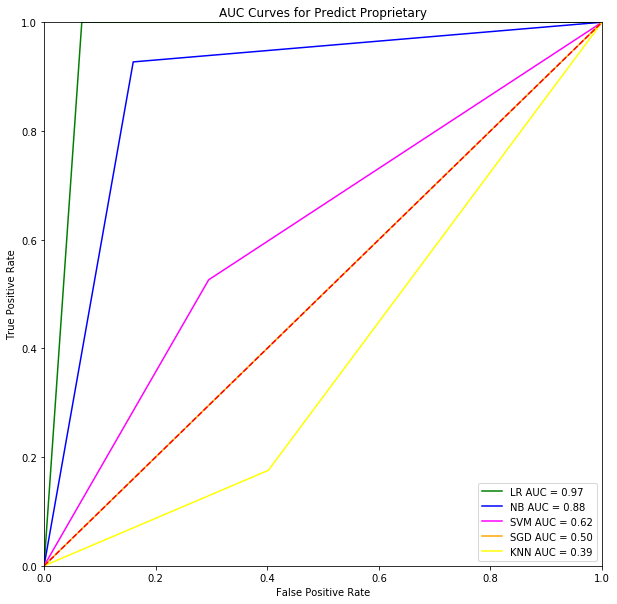

In [108]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# Logistic Regression
logfpr, logtpr, logthreshold = metrics.roc_curve(df.proprietary, logPredictions)
logroc_auc = metrics.auc(logfpr, logtpr)
plt.plot(logfpr, logtpr, 'green', label = 'LR AUC = %0.2f' % logroc_auc)
print('Log AUC: ', logroc_auc)



# Naive bayes
gnbfpr, gnbtpr, gnbthreshold = metrics.roc_curve(df.proprietary, gnbPredictions)
gnbroc_auc = metrics.auc(gnbfpr, gnbtpr)
plt.plot(gnbfpr, gnbtpr, 'blue', label = 'NB AUC = %0.2f' % gnbroc_auc)
print('NB AUC: ', gnbroc_auc)


# SVM
svmfpr, svmtpr, svmthreshold = metrics.roc_curve(df.proprietary, svmPredictions)
svmroc_auc = metrics.auc(svmfpr, svmtpr)
plt.plot(svmfpr, svmtpr, 'magenta', label = 'SVM AUC = %0.2f' % svmroc_auc)
print('SVM AUC: ', svmroc_auc)

# SGD w/ Elastic Net
SGDfpr, SGDtpr, SGDthreshold = metrics.roc_curve(df.proprietary, elasticPredictions)
SGDroc_auc = metrics.auc(SGDfpr, SGDtpr)
plt.plot(SGDfpr, SGDtpr, 'orange', label = 'SGD AUC = %0.2f' % SGDroc_auc)
print('SGD AUC: ', SGDroc_auc)


# KNN
KNNfpr, KNNtpr, KNNthreshold = metrics.roc_curve(df.proprietary, KNNpredictions)
KNNroc_auc = metrics.auc(KNNfpr, KNNtpr)
plt.plot(KNNfpr, KNNtpr, 'yellow', label = 'KNN AUC = %0.2f' % KNNroc_auc)
print('KNN AUC: ', KNNroc_auc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC Curves for Predict Proprietary')
plt.savefig('proprietaryAUC.png')
plt.show()

# Predict High CDR

In [10]:
df['cdrHigh'] = [1 if x >= 0.536775872 else 0 for x in df.cdr2016_log]

# data = df.drop(columns = 'proprietary')
data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log', 'proprietary']]
target = df['cdrHigh']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

model = knn
y = df.cdrHigh

scores = cross_val_score(model, df, y, cv=6)
print(scores)


KNNpredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(df.proprietary, KNNpredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, KNNpredictions))

print("precision: ",metrics.precision_score(y, KNNpredictions))

print("recall: ",metrics.recall_score(y, KNNpredictions))

print("kappa: ",metrics.cohen_kappa_score(y, KNNpredictions))

[0.49916528 0.15358932 0.01335559 0.03846154 0.2458194  0.5       ]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1331  1110  2441
1           389   761  1150
All        1720  1871  3591
accuracy:  0.24171539961013644
precision:  0.25227151256012825
recall:  0.26280623608017817
kappa:  -0.5165869595731101


## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y = df.cdrHigh
model = gnb

scores = cross_val_score(model, df, y, cv=6)
print(scores)

gnbPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, gnbPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, gnbPredictions))

print("precision:",metrics.precision_score(y, gnbPredictions))

print("recall:",metrics.recall_score(y, gnbPredictions))

print("kappa:",metrics.cohen_kappa_score(y, gnbPredictions))

[0.92654424 0.90317195 0.9933222  0.98996656 0.98829431 0.7826087 ]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1664   131  1795
1           118  1678  1796
All        1782  1809  3591
accuracy:  0.9306599832915622
precision: 0.9275843007186291
recall: 0.9342984409799554
kappa: 0.8613196762157612


## Logistic Regression

In [13]:
import sklearn.linear_model as lm

log = lm.LogisticRegression(max_iter = 200).fit(X_train, y_train)

model = log

y = df.cdrHigh

# Compute class predictions: y_prediction
logPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, logPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, logPredictions))

print("precision:",metrics.precision_score(y, logPredictions))

print("recall:",metrics.recall_score(y, logPredictions))

print("kappa:",metrics.cohen_kappa_score(y, logPredictions))

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted    0     1   All
Actual                    
0          598  1197  1795
1            0  1796  1796
All        598  2993  3591
accuracy:  0.6666666666666666
precision: 0.600066822586034
recall: 1.0
kappa: 0.3332094924286152


## SVM

In [14]:
from sklearn import svm

svm = svm.SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

model = svm

y = df.cdrHigh

# Compute class predictions: y_prediction
svmPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, svmPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, svmPredictions))

print("precision:",metrics.precision_score(y, svmPredictions))

print("recall:",metrics.recall_score(y, svmPredictions))

print("kappa:",metrics.cohen_kappa_score(y, svmPredictions))

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0           971   824  1795
1          1263   533  1796
All        2234  1357  3591
accuracy:  0.41882483987747143
precision: 0.39277818717759766
recall: 0.2967706013363029
kappa: -0.16227127490218396


## Elastic Net

In [16]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(random_state=0)
elastic.fit(X_train, y_train)

model = elastic

y = df.cdrHigh

# Compute class predictions: y_prediction
elasticPredictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, elasticPredictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, elasticPredictions))

print("precision:",metrics.precision_score(y, elasticPredictions))

print("recall:",metrics.recall_score(y, elasticPredictions))

print("kappa:",metrics.cohen_kappa_score(y, elasticPredictions))

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted  0.4268507297426985  0.42687599715177293  0.4269138982653846  \
Actual                                                                   
0                           1                    1                   0   
1                           0                    0                   1   
All                         1                    1                   1   

Predicted  0.4269517993789963  0.4269581162312649  0.4269644330835335  \
Actual                                                                  
0                           0                   1                   0   
1                           1                   0                   1   
All                         1                   1                   1   

Predicted  0.42703391845848826  0.427248691435621  0.42748241496955963  \
Actual                                                                   
0                            0                  0                    1   
1                       

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## AUC Curves

<IPython.core.display.Javascript object>

SVM AUC:  0.7350127353365513


<IPython.core.display.Javascript object>

NB AUC:  0.6718500970735444


<IPython.core.display.Javascript object>

KNN AUC:  0.6035037315426679


<IPython.core.display.Javascript object>

Log AUC:  0.3877514561031652


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

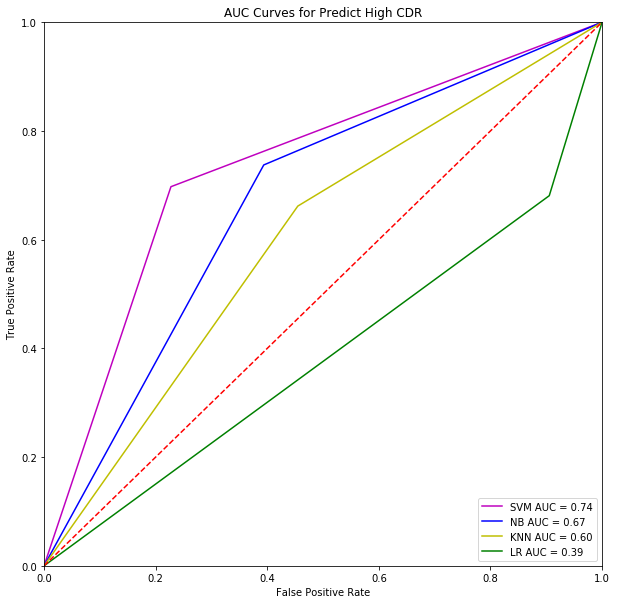

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# SVM
svmfpr, svmtpr, svmthreshold = metrics.roc_curve(df.proprietary, svmPredictions)
svmroc_auc = metrics.auc(svmfpr, svmtpr)
plt.plot(svmfpr, svmtpr, 'm', label = 'SVM AUC = %0.2f' % svmroc_auc)
print('SVM AUC: ', svmroc_auc)

# Naive bayes
gnbfpr, gnbtpr, gnbthreshold = metrics.roc_curve(df.proprietary, gnbPredictions)
gnbroc_auc = metrics.auc(gnbfpr, gnbtpr)
plt.plot(gnbfpr, gnbtpr, 'b', label = 'NB AUC = %0.2f' % gnbroc_auc)
print('NB AUC: ', gnbroc_auc)

# KNN
KNNfpr, KNNtpr, KNNthreshold = metrics.roc_curve(df.proprietary, KNNpredictions)
KNNroc_auc = metrics.auc(KNNfpr, KNNtpr)
plt.plot(KNNfpr, KNNtpr, 'y', label = 'KNN AUC = %0.2f' % KNNroc_auc)
print('KNN AUC: ', KNNroc_auc)



# Logistic Regression
logfpr, logtpr, logthreshold = metrics.roc_curve(df.proprietary, logPredictions)
logroc_auc = metrics.auc(logfpr, logtpr)
plt.plot(logfpr, logtpr, 'g', label = 'LR AUC = %0.2f' % logroc_auc)
print('Log AUC: ', logroc_auc)



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC Curves for Predict High CDR')


# plt.savefig('cdrHighAUC.png')
plt.show()

